In [2]:
#put imports here
import pandas as pd
import os as _dir
import scipy.stats as st
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt


In [3]:
working_dir = _dir.getcwd()
csv_path = "top10s.csv"
for root, dirs, files in _dir.walk(working_dir):
    if csv_path in files:
        csv_path = (_dir.path.join(root, csv_path))
        
song_df=pd.read_csv(csv_path,encoding="ISO-8859-1")

song_df.drop(song_df.columns[song_df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)


In [4]:
db=song_df["dB"].min()
db

-60

In [5]:
clean_df = song_df.drop([442])
clean_df

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75
599,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75
600,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70
601,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,114,79,60,-6,42,24,217,1,7,69


In [6]:
year_Group = clean_df.groupby("year", as_index=True)
#year_Group = song_df.groupby("year", as_index=True)

year_Max_Popularity = year_Group.max()["pop"]
year_Mean_Popularity = year_Group.mean()["pop"]
year_Max_dB = year_Group.max()["dB"]
year_mean_dB = year_Group.mean()["dB"]
year_Max_BPM = year_Group.max()["bpm"]
year_Mean_BPM = year_Group.mean()["bpm"]
year_Group = song_df.groupby("year", as_index=True)



year_Max_Popularity = year_Group.max()["pop"]
year_Mean_Popularity = year_Group.mean()["pop"]
year_Max_dB = year_Group.max()["dB"]
year_mean_dB = year_Group.mean()["dB"]
year_Max_BPM = year_Group.max()["bpm"]
year_Mean_BPM = year_Group.mean()["bpm"]
year_Max_Length = year_Group.max()["dur"]
year_Mean_Length = year_Group.mean()["dur"]
number = year_Group["dur"].count()


year_by_Popularity_df = pd.DataFrame({
                         "Highest popularity" : year_Max_Popularity,
                         "Average popularity" : year_Mean_Popularity,
                         "Loudest" : year_Max_dB,
                         "Loudness Average" : year_mean_dB,
                         "Highest Beats per Minute" : year_Max_BPM,
                         "Average Beats per Minute" : year_Mean_BPM,
                         "Max Length" : year_Max_Length,
                         "Average Length" : year_Mean_Length,
                         "Number of songs" : number
                         })

#Show data frame with average pop rounded                         
year_by_Popularity_df.style.format({"Average popularity": "{:.2f}",
                                    "Loudness Average": "{:.2f}",
                                    "Average Beats per Minute": "{:.2f}",
                                    "Average Length": "{:.2f}"
                                    })       


,Highest popularity,Average popularity,Loudest,Loudness Average,Highest Beats per Minute,Average Beats per Minute,Max Length,Average Length,Number of songs
year,,,,,,,,,
2010,83,64.25,-2,-4.90,186,122.06,329,229.80,51
2011,81,61.87,-3,-5.02,175,119.08,379,242.57,53
2012,80,67.77,-2,-4.86,184,121.09,279,224.40,35
2013,88,63.99,-2,-5.14,201,121.68,424,234.49,71
2014,86,62.71,-3,-5.78,192,123.00,323,224.16,58
2015,84,64.57,-3,-5.62,206,119.77,320,223.37,95
2016,84,64.16,-3,-6.71,186,114.33,403,220.22,80
2017,87,69.02,-2,-5.62,192,116.80,289,222.17,65
2018,86,72.44,-3,-5.67,180,114.59,341,217.19,64


In [26]:
#data frame showing
year_by_Popularity_df = pd.DataFrame({
                         "Highest popularity" : year_Max_Popularity,
                         "Average popularity" : year_Mean_Popularity,
                         "Number of songs" : number
                         })

year_by_Popularity_df.style.format({"Average popularity": "{:.2f}"})       


,Highest popularity,Average popularity,Number of songs
year,,,
2010,83,64.25,51
2011,81,61.87,53
2012,80,67.77,35
2013,88,63.99,71
2014,86,62.71,58
2015,84,64.57,95
2016,84,64.16,80
2017,87,69.02,65
2018,86,72.44,64


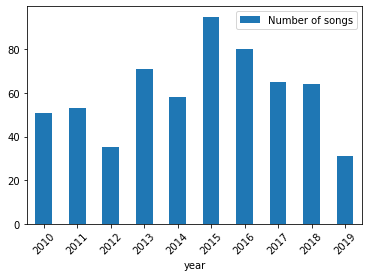

In [24]:
year_by_Popularity_df.plot.bar(y="Number of songs", rot=45 )

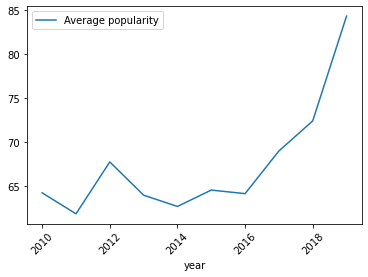

In [72]:
year_by_Popularity_df.plot.line(y="Average popularity", rot=45 )


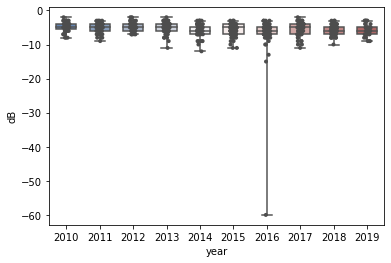

In [21]:
#Showing the difference a single outlier caused -- Before
sns.boxplot(x= "year", y="dB", data=song_df,
            whis=[0, 100], width=.6, palette="vlag")

sns.stripplot(x= "year", y="dB", data=song_df,
              size=4, color=".3", linewidth=0)

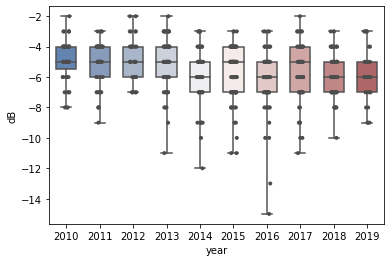

In [22]:
#Showing the difference a single outlier caused -- after
sns.boxplot(x= "year", y="dB", data=clean_df,
            whis=[0, 100], width=.6, palette="vlag")

sns.stripplot(x= "year", y="dB", data=clean_df,
              size=4, color=".3", linewidth=0)



Logan Section -------------------------------------------------------------------------------------------------------------------------------^

Max Section-------------------------------------------------------------------------------------------------------------------------------v

In [10]:
cln_songs= clean_df

#select columns that could correlate with 'year'
cols=['bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch']

#create a series with the years that are being investigated
years=song_df['year'].unique()

#create dataframes for each year
songs2010=cln_songs[cln_songs['year']==2010]
songs2011=cln_songs[cln_songs['year']==2011]
songs2012=cln_songs[cln_songs['year']==2012]
songs2013=cln_songs[cln_songs['year']==2013]
songs2014=cln_songs[cln_songs['year']==2014]
songs2015=cln_songs[cln_songs['year']==2015]
songs2016=cln_songs[cln_songs['year']==2016]
songs2017=cln_songs[cln_songs['year']==2017]
songs2018=cln_songs[cln_songs['year']==2018]
songs2019=cln_songs[cln_songs['year']==2019]

#set up dictionary for dataframe to observe p-values of each variable going year to year
p_values={'bpm': [],
         'nrgy': [],
         'dnce': [],
         'dB': [],
         'live': [],
         'val': [],
         'dur': [],
         'acous': [],
         'spch': []
         }

#set up list that will collect variables with p-values < .05
cols_of_interest = []

#print header for anova p-values
print("P-Values")
print("=============")


for x in cols:
    #create dataframe to investigate year to year p-values
    data={'2010': songs2010[x],
         '2011': songs2011[x],
         '2012': songs2012[x], 
         '2013': songs2013[x],
         '2014': songs2014[x],
         '2015': songs2015[x],
         '2016': songs2016[x],
         '2017': songs2017[x],
         '2018': songs2018[x],
         '2019': songs2019[x]
         }
      
    df=pd.DataFrame(data)

    #perform anova to determine p-value of each variable over all years
    anova_x=st.f_oneway(songs2010[x],
                          songs2011[x],
                          songs2012[x],
                          songs2013[x],
                          songs2014[x],
                          songs2015[x],
                          songs2016[x],
                          songs2017[x],
                          songs2018[x],
                          songs2019[x]
                          )
    #print out p-values
    print(f'{x}: {anova_x[1]}')
    
    #if anova p-value < 0.05, add variable to cols_of_interest
    if anova_x[1]<0.05: cols_of_interest.append(x)
        
    #iterate to get the year to year p-values
    for y in range(len(years)-1):
        tt_result=st.ttest_ind(df.iloc[:,y], df.iloc[:,y+1], equal_var=False, nan_policy='omit')
        p_values[x].append(tt_result[1])

#put year to year p-values in a dataframe
pv_df=pd.DataFrame(p_values)

#eliminate columns that are not of interest
pv_df=pv_df[cols_of_interest]

P-Values
bpm: 0.36967973195039544
nrgy: 3.73875679491185e-05
dnce: 0.17862413007400588
dB: 0.00033079933395437647
live: 0.06596956774617194
val: 0.012335092578973217
dur: 2.155622201166031e-06
acous: 0.02358298459505646
spch: 0.2468304343030727


In [11]:
#set up year_ranges list
year_ranges=['2010-2011', '2011-2012', '2012-2013', '2013-2014', '2014-2015', '2015-2016', '2016-2017', '2017-2018', '2018-2019']

#assign year_ranes as index
pv_df.index=year_ranges
pv_df



,nrgy,dB,val,dur,acous
2010-2011,0.315798,0.670561,0.434159,0.069026,0.673638
2011-2012,0.840209,0.609837,0.017232,0.006575,0.014135
2012-2013,0.558790,0.371265,0.008782,0.123504,0.031619
2013-2014,0.047062,0.045532,0.791735,0.121015,0.051916
2014-2015,0.381852,0.603190,0.915617,0.883263,0.810216
2015-2016,0.373960,0.132802,0.048538,0.509626,0.882345
2016-2017,0.691014,0.186993,0.067162,0.690993,0.885046
2017-2018,0.141768,0.847110,0.361406,0.360041,0.256730
2018-2019,0.837358,0.783014,0.678636,0.010960,0.058223


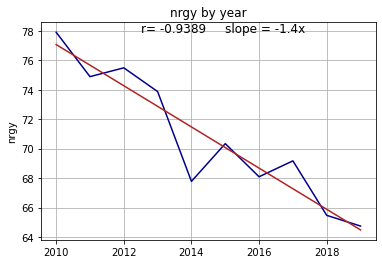

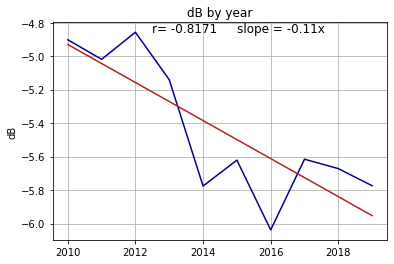

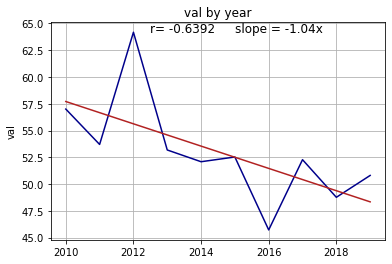

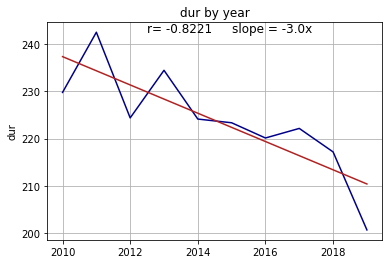

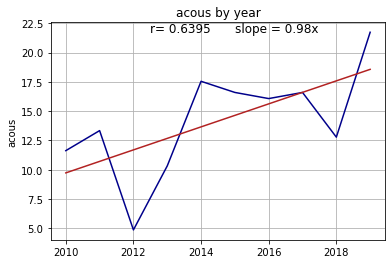

In [15]:
#group songs by year
by_year=cln_songs.groupby('year')

#iterate over selected columns
for x in cols_of_interest:
    #set up var = the average of iterable for each year
    var=by_year[x].mean()
    
    #set up variables for linear regression
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(var.index, var)
    regress_values = var.index * slope + intercept
    
    #plot each variable in cols_of_interest
    plt.plot(var.index, var, color='darkblue')
    #plot linear regression line
    plt.plot(var.index,regress_values, color="firebrick")
    
    #customize plot
    plt.title(f'{x} by year')
    plt.ylabel(x)
    plt.grid()
    line_eq = "slope = " + str(round(slope,2)) + "x"
    correlation = st.pearsonr(var.index, var)
    plt.annotate(f'r= {round(correlation[0], 4)}', (2012.5, var.max()), size=12)
    plt.annotate(line_eq, (2015, var.max()), size=12)
   #plt.savefig(f'C:\\Users\\pmaxl\\OneDrive\\Desktop\\Group-Projects\\Teams-Challenge\\images\\{x}_by_year.png')
    plt.show()

In [17]:

#dict for pct change
pct_change={
           'nrgy': [],
           'dB': [],
           'val': [],
           'dur': [],
           'acous': []
           }

#set up mean_by_year variable
mean_by_year=by_year.mean()

#iterate through 2018, 2019 will be included using x+1
for x in range(2010, 2019):
    for y in cols_of_interest:
        
        #find x+1 - x of iterable
        change=mean_by_year.loc[(x+1),y] - mean_by_year.loc[x, y]
        
        #divide by x and multiply by 100 to get %
        changepct=(change/abs(mean_by_year.loc[x,y]))*100
        changepct=round(changepct, 2)
        pct_change[y].append(changepct)

#convert dict to df        
pc_df=pd.DataFrame(pct_change)
pc_df.index=year_ranges
pc_df

,nrgy,dB,val,dur,acous
2010-2011,-3.87,-2.38,-5.79,5.55,14.73
2011-2012,0.80,3.22,19.50,-7.49,-63.59
2012-2013,-2.14,-5.84,-17.12,4.50,112.55
2013-2014,-8.25,-12.35,-2.06,-4.41,70.01
2014-2015,3.78,2.68,0.84,-0.35,-5.42
2015-2016,-3.20,-7.42,-12.96,-1.45,-3.16
2016-2017,1.59,7.00,14.34,0.92,3.26
2017-2018,-5.35,-1.01,-6.72,-2.24,-23.00
2018-2019,-1.11,-1.80,4.18,-7.62,70.11


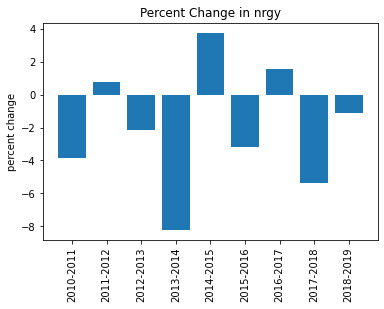

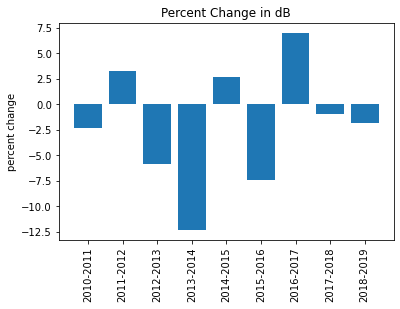

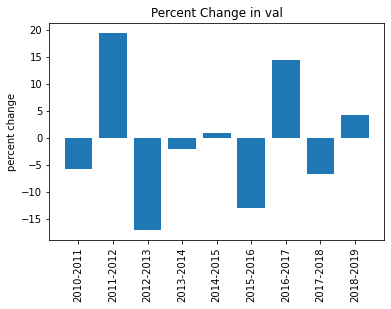

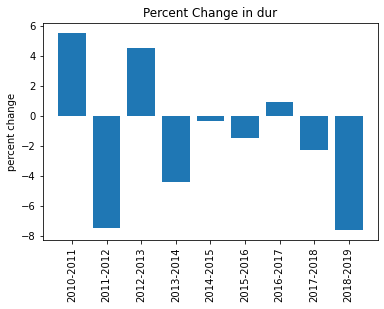

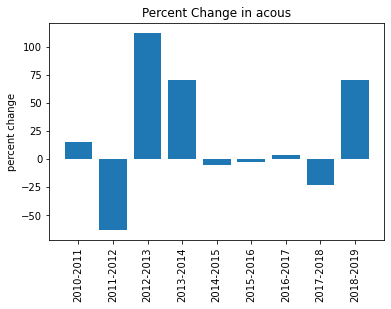

In [18]:
#iterate to convert above table to a bar plot
for y in cols_of_interest:
    plt.bar(x=pc_df.index, height=pc_df[y])
    plt.ylabel("percent change")
    plt.title(f'Percent Change in {y}')
    plt.xticks(rotation=90)
    plt.show()

In [19]:
#set up dict for df
avg_pct_change={'Category': [],
               'Average Change by Year': []}

for x in cols_of_interest:
    #append col_of_inteterest
    avg_pct_change['Category'].append(x)
    
    #append mean of pct change
    avg_change=pc_df[x].mean()
    avg_pct_change['Average Change by Year'].append(avg_change)

#convert to df
apc_df=pd.DataFrame(avg_pct_change)

apc_df


,Category,Average Change by Year
0,nrgy,-1.972222
1,dB,-1.988889
2,val,-0.643333
3,dur,-1.398889
4,acous,19.498889


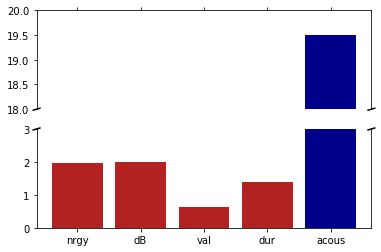

In [20]:
#empty list to assign colors for bars in bar chart
colors=[]

#iterate to assign colors to colors list based on if the variable is increasing or decreasing
for x in range(len(apc_df)):
    if apc_df.loc[x, 'Average Change by Year']>0:
        colors.append('darkblue')
    else:
        colors.append('firebrick')
    

#create bar chart to show above table
fig, (ax, ax2) = plt.subplots(2, 1, sharex=True)

#used 2 axises to create a break in the y axis
#ax to set up the top half of the figure
ax.bar(x=apc_df['Category'],
       height= abs(apc_df['Average Change by Year']),
       color=colors)
#ax2 to set up the bottom half of the figure
ax2.bar(x=apc_df['Category'],
       height= abs(apc_df['Average Change by Year']),
       color=colors)

#set up y ranges for the two axises
ax.set_ylim(18, 20)
ax2.set_ylim(0, 3)

#add the hash marks at the break
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop=False)  
ax2.xaxis.tick_bottom()
d = .01  
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  

kwargs.update(transform=ax2.transAxes)  
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs) 

#plt.savefig(f'C:\\Users\\pmaxl\\OneDrive\\Desktop\\Group-Projects\\Teams-Challenge\\images\\Percent_change.png')

plt.show()


Max Section------------------------------------------------------------------------------------------------------------------------------- ^

Jon Section -------------------------------------------------------------------------------------------------------------------------------v

In [34]:
bpm=clean_df['bpm']
eng=clean_df['nrgy']
pop=clean_df['pop']

The r-value is:0.095


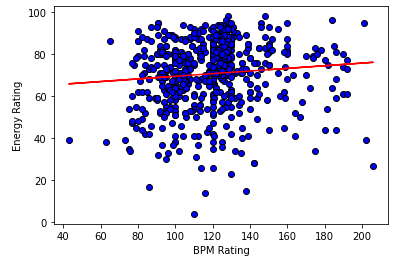

In [35]:
# Generate graph with corr, and slope for BPM and Energy
(slope, intercept, rvalue, pvalue, stderr)=st.linregress(bpm,eng)
regress_values=bpm * slope + intercept

plt.xlabel("BPM Rating")
plt.ylabel("Energy Rating")
line_eq="y="+ str(round(slope,2)) + "x +" +str(round(intercept,2))
plt.scatter(bpm,eng, marker="o", facecolors="blue", edgecolors="black")
plt.plot(bpm,regress_values,"r-")
plt.annotate(line_eq,(10,10),fontsize=15,color="red")
print(f'The r-value is:{round(rvalue,3)}')
plt.show()


### No correlation between the Beats per minute and energy rating

   No correlation when compared as a whole. Not group by year

The r-value is:-0.018


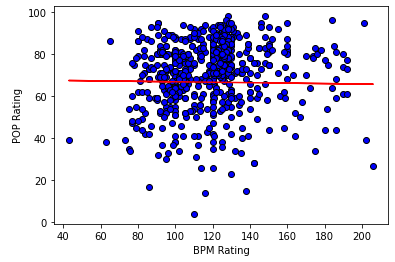

In [61]:
# Generate graph with corr, and slope for BPM and Popularity
(slope, intercept, rvalue, pvalue, stderr)=st.linregress(bpm,pop)
regress_values=bpm * slope + intercept

plt.xlabel("BPM Rating")
plt.ylabel("POP Rating")
line_eq="y="+ str(round(slope,2)) + "x +" +str(round(intercept,2))
plt.scatter(bpm,eng, marker="o", facecolors="blue", edgecolors="black")
plt.plot(bpm,regress_values,"r-")
plt.annotate(line_eq,(10,10),fontsize=15,color="red")
print(f'The r-value is:{round(rvalue,3)}')
plt.show()

The r-value is:-0.094


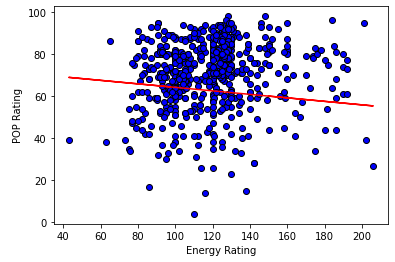

In [37]:
# Generate graph with corr, and slope for Energy and Popularity
(slope, intercept, rvalue, pvalue, stderr)=st.linregress(eng,pop)
regress_values=bpm * slope + intercept

plt.xlabel("Energy Rating")
plt.ylabel("POP Rating")
line_eq="y="+ str(round(slope,2)) + "x +" +str(round(intercept,2))
plt.scatter(bpm,eng, marker="o", facecolors="blue", edgecolors="black")
plt.plot(bpm,regress_values,"r-")
plt.annotate(line_eq,(10,10),fontsize=15,color="red")
print(f'The r-value is:{round(rvalue,3)}')
plt.show()

### Scatter plots show no significant correlation between groups 

Data maybe too broad so group by year to find any correlation.

In [38]:
# Correlation dataframe for presentation
song_engy_pop=round(st.pearsonr(eng,pop)[0],4)
song_engy_bpm=round(st.pearsonr(bpm,eng)[0],4)
song_bpm_pop=round(st.pearsonr(bpm,pop)[0],4)

In [39]:
#Create the dataframe
null_corr_df=pd.DataFrame({'BPM vs. Energy':[song_engy_bpm],
                      'BPM vs. Popularity':[song_bpm_pop],
                      'Energy vs. Popularity':[song_engy_pop],
                     },index=['Correlation Values:'])
null_corr_df



,BPM vs. Energy,BPM vs. Popularity,Energy vs. Popularity
Correlation Values:,0.0951,-0.0181,-0.0937


Groupby year to provide smaller sample size

In [49]:
#Groupby year and set variables for correlations
years_df=clean_df.groupby(['year'])
#years_df.head()
bpm_year=years_df['bpm'].mean()
engy_year=years_df['nrgy'].mean()
pop_year=years_df['pop'].mean()

In [50]:
#Run a correaltion test
corr_bpm_engy=st.pearsonr(bpm_year,engy_year)
print(f'Correlation of bpm and energy is {round(corr_bpm_engy[0],4)}')
corr_bpm_pop=st.pearsonr(bpm_year,pop_year)
print(f'Correlation of bpm and popularity is {round(corr_bpm_pop[0],4)}')
corr_engy_pop=st.pearsonr(engy_year,pop_year)
print(f'Correlation of energy and popularity is {round(corr_engy_pop[0],4)}')

Correlation of bpm and energy is 0.714
Correlation of bpm and popularity is -0.7828
Correlation of energy and popularity is -0.6028


In [51]:
#Create variables for dataframe
bpm_eng=round(corr_bpm_engy[0],4)
bpm_pop=round(corr_bpm_pop[0],4)
engy_pop=round(corr_engy_pop[0],4)

In [52]:
#Create dataframe
Corr_df=pd.DataFrame({'BPM vs.Energy':[bpm_eng],
                      'BPM and Popularity':[bpm_pop],
                      'Energy and Popularity':[engy_pop],
                     },index=['Correlation Values:'])

Corr_df

,BPM vs.Energy,BPM and Popularity,Energy and Popularity
Correlation Values:,0.714,-0.7828,-0.6028


### A correlation exist between BPM vs. Popularity, and BPM vs. Energy with a smaller sample size.

Wanting to explore the relationship between BPM and Popularity

In [53]:
#create dataframe for the boxplot
yearavg=pd.DataFrame({'BPM Avgs':bpm_year,'Energy Avgs':engy_year,'Popularity Avgs':pop_year})

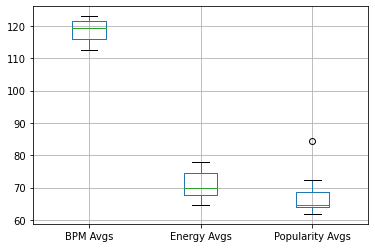

In [54]:
#create box plot
yearavg.boxplot()
plt.show()

A box and whisker to see how far apart the values lie

The r-value is:-0.783


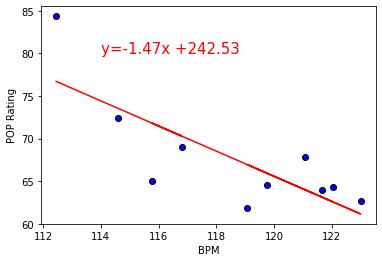

In [55]:
# Generate graph with corr, and slope for BPM and Popularity
(slope, intercept, rvalue, pvalue, stderr)=st.linregress(bpm_year,pop_year)
regress_values=bpm_year * slope + intercept

plt.xlabel("BPM")
plt.ylabel("POP Rating")
line_eq="y="+ str(round(slope,2)) + "x +" +str(round(intercept,2))
plt.scatter(bpm_year,pop_year, marker="o", facecolors="blue", edgecolors="black")
plt.plot(bpm_year,regress_values,"r-")
plt.annotate(line_eq,(114,80),fontsize=15,color="red")
print(f'The r-value is:{round(rvalue,3)}')
plt.show()

The r-value is:-0.783


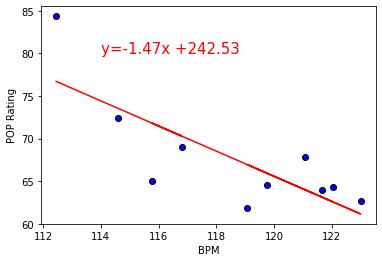

In [56]:
# Generate graph with corr, and slope for BPM and Popularity
(slope, intercept, rvalue, pvalue, stderr)=st.linregress(bpm_year,pop_year)
regress_values=bpm_year * slope + intercept

plt.xlabel("BPM")
plt.ylabel("POP Rating")
line_eq="y="+ str(round(slope,2)) + "x +" +str(round(intercept,2))
plt.scatter(bpm_year,pop_year, marker="o", facecolors="blue", edgecolors="black")
plt.plot(bpm_year,regress_values,"r-")
plt.annotate(line_eq,(114,80),fontsize=15,color="red")
print(f'The r-value is:{round(rvalue,3)}')
plt.show()

The difference between graphs are the switching the x and y

The r-value is:-0.783


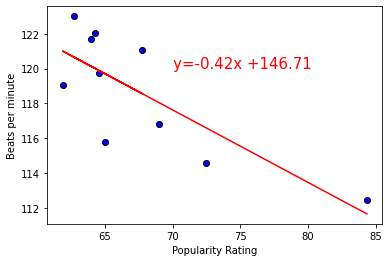

In [57]:
# Generate graph with corr, and slope for Energy and Popularity. Same Graph just switch the x and y axis values
(slope, intercept, rvalue, pvalue, stderr)=st.linregress(pop_year,bpm_year)
regress_values=pop_year * slope + intercept

plt.xlabel("Popularity Rating")
plt.ylabel("Beats per minute")
line_eq="y="+ str(round(slope,2)) + "x +" +str(round(intercept,2))
plt.scatter(pop_year,bpm_year, marker="o", facecolors="blue", edgecolors="black")
plt.plot(pop_year,regress_values,"r-")
plt.annotate(line_eq,(70,120),fontsize=15,color="red")
print(f'The r-value is:{round(rvalue,3)}')
plt.show()

In [63]:
#Calculate the Critical Value
crit_val=st.chi2.ppf(q=0.95, df=9)
critical_value=pd.DataFrame({'Critical Value':[crit_val]},index=['Results:'])
critical_value

,Critical Value
Results:,16.918978


In [64]:
#Calculate the Chi-Square and assign it a value 
#st.chisquare(pop_year,bpm_year)
chi=st.chisquare(pop_year,bpm_year)
chi


Power_divergenceResult(statistic=225.0480028248716, pvalue=1.8145062924368403e-43)

In [65]:
#Create chi square
Chi_df=pd.DataFrame({'Chi-Square Results':chi},index=['Statistic:','P-Value:'])
Chi_df


,Chi-Square Results
Statistic:,2.250480e+02
P-Value:,1.814506e-43


Jon Section -------------------------------------------------------------------------------------------------------------------------------^

In [22]:
song_df.shape
(603, 14)
song_df

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75
599,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75
600,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70
601,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,114,79,60,-6,42,24,217,1,7,69


In [21]:
song_df.columns
Index(['title', 'artist', 'top genre', 'year', 'bpm', 'nrgy', 'dnce', 'dB',
       'live', 'val', 'dur', 'acous', 'spch', 'pop'],
      dtype='object')
song_df["top genre"].value_counts()


NameError: name 'Index' is not defined

In [11]:
years_df=song_df.groupby(["year"])
years_df['top genre'].describe()


,count,unique,top,freq
year,,,,
2010,51,13,dance pop,31
2011,53,9,dance pop,38
2012,35,9,dance pop,15
2013,71,18,dance pop,42
2014,58,18,dance pop,27
2015,95,18,dance pop,52
2016,80,19,dance pop,46
2017,65,18,dance pop,31
2018,64,13,dance pop,38


In [12]:
song_df["top genre"]

0           neo mellow
1      detroit hip hop
2            dance pop
3            dance pop
4                  pop
            ...       
598          dance pop
599                pop
600          dance pop
601          dance pop
602         electropop
Name: top genre, Length: 603, dtype: object

In [13]:
song_df["top genre"].describe

<bound method NDFrame.describe of 0           neo mellow
1      detroit hip hop
2            dance pop
3            dance pop
4                  pop
            ...       
598          dance pop
599                pop
600          dance pop
601          dance pop
602         electropop
Name: top genre, Length: 603, dtype: object>

The r-value is:-0.136


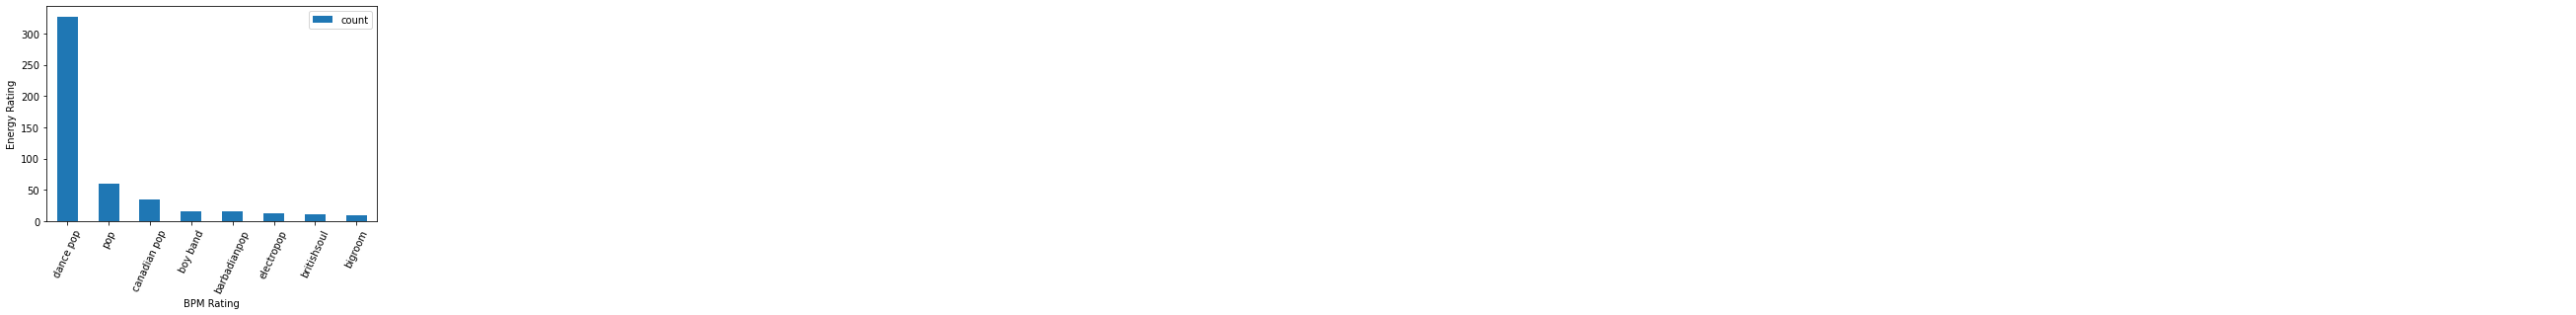

In [16]:
 # Create an array 
count = [327,60,34,15,15,13,11,10]
index = ['dance pop', 'pop', 'canadian pop', 'boy band', 'barbadianpop', 'electropop', 'britishsoul', 'bigroom']
df = pd.DataFrame({'count': count}, index=index)
ax = df.plot.bar(rot=65)
val=years_df['val'].mean()
pop=years_df['pop'].mean()
corr=st.pearsonr(val,pop)
corr
(-0.13635109494951342, 0.7072156821171067)
(slope, intercept, rvalue, pvalue, stderr)=st.linregress(val,pop)
regress_values=val * slope + intercept
plt.xlabel("BPM Rating")
plt.ylabel("Energy Rating")
line_eq="y="+ str(round(slope,2)) + "x +" +str(round(intercept,2))
plt.scatter(val,pop, marker="o", facecolors="blue", edgecolors="black")
plt.plot(val,regress_values,"r-")
plt.annotate(line_eq,(57.5,75),fontsize=15,color="red")
print(f'The r-value is:{round(rvalue,3)}')
plt.show()


In [17]:
(slope,)

(-0.18272779271343897,)